# ***TRABAJO PRACTICO- REDES NEURONALES***




#Apellido, Nombre, DNI, email de todos los integrantes del grupo


# GRUPO X20
# Llanes Carlos Martin DNI: 14782340 EMAIL carelife8@gmail.com
# Jose ignacio Caraballo DNI: 30351231 EMAIL nacho27583@hotmail.com
# Luján, David Alberto DNI:31633877 EMAIL dal340@hotmail.com
# Leonel Ejarque DNI 30368892 EMAIL leonelejarque14@gmail.com
# Martinez, Bruno Maximiliano DNI: 38029411 EMAIL martinezbruno13194@gmail.com
# Agresti Yanina DNI 33.694996 EMAIL yaninakaleb@gmail.com
# Martin Bahl DNI 44208195 EMAIL bahlmartinexactas@gmail.com
# Mercado Pamela Denisse DNI: 39272061 Email: pamelamercado23@hotmail.com
# Agustín Salum DNI 36764860 EMAIL agustinsalum92@hotmail.com


Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año.Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del sigueinte enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos.


1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos.


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

In [ ]:
# Importo librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datetime import datetime, timedelta
import random
import tensorflow as tf

In [ ]:
 #SI LO TIENEN EN EL DRIVE
 #registro_temperatura365d_smn.txt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SI LO TIENEN EN EL DRIVE COPIAN LA DIRECCION DONDE ESTA EL ARCHIVO
SINO COPIAN EL ARCHIVO QUE DEBEN SUBIR AL COLAB
registro_temperatura365d_smn.txt

In [ ]:
# 1.Asumiendo que el archivo "data.txt" se encuentra en el mismo directorio que el script
# y que los campos están separados por tabulaciones
data = pd.read_fwf("/content/drive/MyDrive/descargas/registro_temperatura365d_smn.txt",encoding='latin-1', decimal=".")
df=pd.DataFrame(data)

In [ ]:
# 2.info de las columnas y sus etiquetas y los primeros 5 registros
print(df)

          FECHA   TMAX   TMIN                                    NOMBRE
0      --------  -----  -----  ----------------------------------------
1      29102023   23.0   17.9                           AEROPARQUE AERO
2      29102023   22.9   14.2                                 AZUL AERO
3      29102023   22.1    8.1                         BAHIA BLANCA AERO
4      29102023    3.5   -0.3                            BARILOCHE AERO
...         ...    ...    ...                                       ...
43675  30102022   13.9    5.4                               VIEDMA AERO
43676  30102022   30.6   14.8               VILLA DE MARIA DEL RIO SECO
43677  30102022   27.8   12.2                        VILLA DOLORES AERO
43678  30102022   15.0    9.0                         VILLA GESELL AERO
43679  30102022   24.8    9.8                       VILLA REYNOLDS AERO

[43680 rows x 4 columns]


In [ ]:
df.head


<bound method NDFrame.head of           FECHA   TMAX   TMIN                                    NOMBRE
0      --------  -----  -----  ----------------------------------------
1      29102023   23.0   17.9                           AEROPARQUE AERO
2      29102023   22.9   14.2                                 AZUL AERO
3      29102023   22.1    8.1                         BAHIA BLANCA AERO
4      29102023    3.5   -0.3                            BARILOCHE AERO
...         ...    ...    ...                                       ...
43675  30102022   13.9    5.4                               VIEDMA AERO
43676  30102022   30.6   14.8               VILLA DE MARIA DEL RIO SECO
43677  30102022   27.8   12.2                        VILLA DOLORES AERO
43678  30102022   15.0    9.0                         VILLA GESELL AERO
43679  30102022   24.8    9.8                       VILLA REYNOLDS AERO

[43680 rows x 4 columns]>

In [ ]:
df.dtypes

FECHA     object
TMAX      object
TMIN      object
NOMBRE    object
dtype: object

In [ ]:
# borro fila 0
df.drop([0], axis=0, inplace=True)

df.head()

,FECHA,TMAX,TMIN,NOMBRE
1,29102023,23.0,17.9,AEROPARQUE AERO
2,29102023,22.9,14.2,AZUL AERO
3,29102023,22.1,8.1,BAHIA BLANCA AERO
4,29102023,3.5,-0.3,BARILOCHE AERO
5,29102023,-4.7,-11.6,BASE BELGRANO II


In [ ]:
# 3. limpio
df = df.dropna()

df.head()

,FECHA,TMAX,TMIN,NOMBRE
1,29102023,23.0,17.9,AEROPARQUE AERO
2,29102023,22.9,14.2,AZUL AERO
3,29102023,22.1,8.1,BAHIA BLANCA AERO
4,29102023,3.5,-0.3,BARILOCHE AERO
5,29102023,-4.7,-11.6,BASE BELGRANO II


In [ ]:
# 4. indexo
df.reset_index(inplace=True)

df

,index,FECHA,TMAX,TMIN,NOMBRE
0,1,29102023,23.0,17.9,AEROPARQUE AERO
1,2,29102023,22.9,14.2,AZUL AERO
2,3,29102023,22.1,8.1,BAHIA BLANCA AERO
3,4,29102023,3.5,-0.3,BARILOCHE AERO
4,5,29102023,-4.7,-11.6,BASE BELGRANO II
...,...,...,...,...,...
40025,43675,30102022,13.9,5.4,VIEDMA AERO
40026,43676,30102022,30.6,14.8,VILLA DE MARIA DEL RIO SECO
40027,43677,30102022,27.8,12.2,VILLA DOLORES AERO
40028,43678,30102022,15.0,9.0,VILLA GESELL AERO


In [ ]:

# 5.borro las columnas index
df.drop(['index'], axis=1,inplace=True)

df.head


<ipython-input-81-e0a91b57d9b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['index'], axis=1,inplace=True)


<bound method NDFrame.head of           FECHA  TMAX   TMIN                       NOMBRE
0      29102023  23.0   17.9              AEROPARQUE AERO
1      29102023  22.9   14.2                    AZUL AERO
2      29102023  22.1    8.1            BAHIA BLANCA AERO
3      29102023   3.5   -0.3               BARILOCHE AERO
4      29102023  -4.7  -11.6             BASE BELGRANO II
...         ...   ...    ...                          ...
40025  30102022  13.9    5.4                  VIEDMA AERO
40026  30102022  30.6   14.8  VILLA DE MARIA DEL RIO SECO
40027  30102022  27.8   12.2           VILLA DOLORES AERO
40028  30102022  15.0    9.0            VILLA GESELL AERO
40029  30102022  24.8    9.8          VILLA REYNOLDS AERO

[40030 rows x 4 columns]>

In [ ]:
# 6.paso de formato objeto a numerico
df["TMAX"] = pd.to_numeric(df["TMAX"], errors="coerce")

df.dtypes

<ipython-input-82-efb277598b73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TMAX"] = pd.to_numeric(df["TMAX"], errors="coerce")


FECHA      object
TMAX      float64
TMIN       object
NOMBRE     object
dtype: object

In [ ]:
# 7.paso de formato objeto a numerico
df["TMIN"] = pd.to_numeric(df["TMIN"], errors="coerce")

df.dtypes

<ipython-input-83-ddbb477822bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TMIN"] = pd.to_numeric(df["TMIN"], errors="coerce")


FECHA      object
TMAX      float64
TMIN      float64
NOMBRE     object
dtype: object

In [ ]:
# 8. separo ezeiza aero
filtro = df['NOMBRE'] == "EZEIZA AERO"

#Ahora, simplemente pasamos este filtro como selector en el DataFrame:


df1 = df[filtro]

df1.head

<bound method NDFrame.head of           FECHA  TMAX  TMIN       NOMBRE
32     29102023  25.0  15.1  EZEIZA AERO
142    28102023  29.5  16.2  EZEIZA AERO
257    27102023  28.5  16.6  EZEIZA AERO
372    26102023  24.5  10.8  EZEIZA AERO
486    25102023  21.0   6.0  EZEIZA AERO
...         ...   ...   ...          ...
39490  03112022  29.1   8.1  EZEIZA AERO
39605  02112022  28.1  10.0  EZEIZA AERO
39720  01112022  23.6   2.4  EZEIZA AERO
39834  31102022  17.3   5.1  EZEIZA AERO
39949  30102022  22.6  10.3  EZEIZA AERO

[365 rows x 4 columns]>

In [ ]:
# 9. saco promedio
df1["t_promedio"] = df1[["TMAX","TMIN"]].mean(axis=1)

df1.head()

<ipython-input-85-a03f55e25956>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["t_promedio"] = df1[["TMAX","TMIN"]].mean(axis=1)


,FECHA,TMAX,TMIN,NOMBRE,t_promedio
32,29102023,25.0,15.1,EZEIZA AERO,20.05
142,28102023,29.5,16.2,EZEIZA AERO,22.85
257,27102023,28.5,16.6,EZEIZA AERO,22.55
372,26102023,24.5,10.8,EZEIZA AERO,17.65
486,25102023,21.0,6.0,EZEIZA AERO,13.50


In [ ]:
# 10. indexo
df1.reset_index(inplace=True)

df1.head

<bound method NDFrame.head of      index     FECHA  TMAX  TMIN       NOMBRE  t_promedio
0       32  29102023  25.0  15.1  EZEIZA AERO       20.05
1      142  28102023  29.5  16.2  EZEIZA AERO       22.85
2      257  27102023  28.5  16.6  EZEIZA AERO       22.55
3      372  26102023  24.5  10.8  EZEIZA AERO       17.65
4      486  25102023  21.0   6.0  EZEIZA AERO       13.50
..     ...       ...   ...   ...          ...         ...
360  39490  03112022  29.1   8.1  EZEIZA AERO       18.60
361  39605  02112022  28.1  10.0  EZEIZA AERO       19.05
362  39720  01112022  23.6   2.4  EZEIZA AERO       13.00
363  39834  31102022  17.3   5.1  EZEIZA AERO       11.20
364  39949  30102022  22.6  10.3  EZEIZA AERO       16.45

[365 rows x 6 columns]>

In [ ]:
# 11.borro las columnas index,etc
df1.drop(['index','TMAX','TMIN','NOMBRE'], axis=1,inplace=True)

df1.head

<ipython-input-87-802602011772>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['index','TMAX','TMIN','NOMBRE'], axis=1,inplace=True)


<bound method NDFrame.head of         FECHA  t_promedio
0    29102023       20.05
1    28102023       22.85
2    27102023       22.55
3    26102023       17.65
4    25102023       13.50
..        ...         ...
360  03112022       18.60
361  02112022       19.05
362  01112022       13.00
363  31102022       11.20
364  30102022       16.45

[365 rows x 2 columns]>

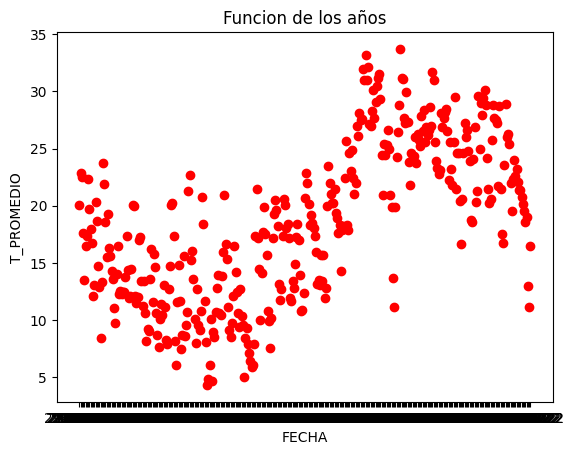

In [ ]:
# 12.Grafico la relacion entre los datos reales

X = df1['FECHA']
y = df1['t_promedio']
# Columnas a graficar

plt.scatter(X, y, color='red')
plt.xlabel('FECHA')  # Etiqueta del eje X
plt.ylabel('T_PROMEDIO')  # Etiqueta del eje Y
plt.title("Funcion de los años")
plt.show()

In [ ]:
# 13.Borro los primeros 193 filas para quedarme
# con la zona lineal de los datos
df2 = df1.drop(df.index[0:192], inplace=False)


df2.head(20)   # pido los registro de ezeiza

,FECHA,t_promedio
192,20042023,13.20
193,19042023,13.50
194,18042023,13.10
195,17042023,15.70
196,16042023,13.40
197,15042023,15.70
198,14042023,11.90
199,13042023,12.80
200,12042023,20.00
201,11042023,23.45


In [ ]:
# 14.Borro las ultimas filas para quedarme
# con la zona lineal de los datos
df3 = df2.drop(df.index[234:365], inplace=False)

df3.head(20)

,FECHA,t_promedio
192,20042023,13.20
193,19042023,13.50
194,18042023,13.10
195,17042023,15.70
196,16042023,13.40
197,15042023,15.70
198,14042023,11.90
199,13042023,12.80
200,12042023,20.00
201,11042023,23.45


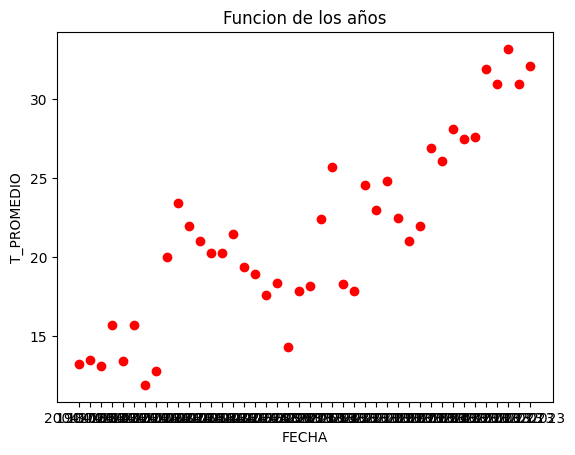

In [ ]:
# 15.Grafico la relacion LINEAL CRECIENTE

X = df3['FECHA']
y = df3['t_promedio']
# Columnas a graficar

plt.scatter(X, y, color='red')
plt.xlabel('FECHA')  # Etiqueta del eje X
plt.ylabel('T_PROMEDIO')  # Etiqueta del eje Y
plt.title("Funcion de los años")
plt.show()

In [ ]:

# 16.Columna precio de helado

precio_minimo = 3000  # Precio minimo por kilo de helado
incremento = 40  # Tasa de variación en precio por grado de aumento de temperatura
error_aleatorio = np.random.normal(loc=0, scale=50, size=len(df3))  # Error aleatorio

df3['Precio_Helado'] = precio_minimo + (df3['t_promedio'] * incremento) + error_aleatorio


df3.head(20)


,FECHA,t_promedio,Precio_Helado
192,20042023,13.20,3516.840909
193,19042023,13.50,3630.520079
194,18042023,13.10,3541.110623
195,17042023,15.70,3664.957039
196,16042023,13.40,3585.605156
197,15042023,15.70,3675.584999
198,14042023,11.90,3455.039535
199,13042023,12.80,3533.246915
200,12042023,20.00,3727.743632
201,11042023,23.45,3857.290663


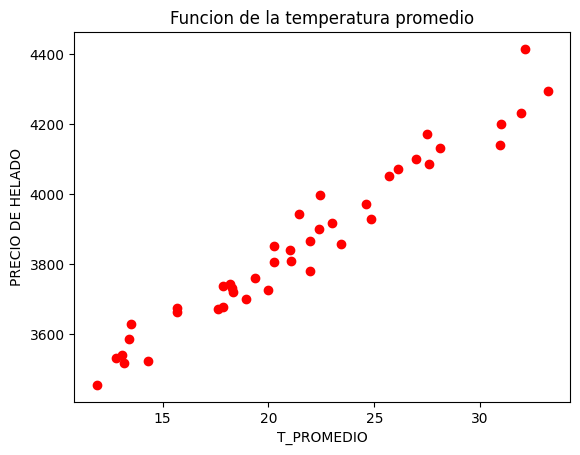

In [ ]:
# 17.Grafico la relacion LINEAL CRECIENTE

X = df3['t_promedio']
y = df3['Precio_Helado']
# Columnas a graficar

plt.scatter(X, y, color='red')
plt.xlabel('T_PROMEDIO')  # Etiqueta del eje X
plt.ylabel('PRECIO DE HELADO')  # Etiqueta del eje Y
plt.title("Funcion de la temperatura promedio")
plt.show()

In [ ]:
# 18.Genero columna de variable categorica
df3["compro_helado2"] = np.where((3000 * 1.4 < df3["Precio_Helado"]) & (random.randint(1 , 10) > 2), "no", "si")

df3.head(43)

,FECHA,t_promedio,Precio_Helado,compro_helado2
192,20042023,13.20,3516.840909,si
193,19042023,13.50,3630.520079,si
194,18042023,13.10,3541.110623,si
195,17042023,15.70,3664.957039,si
196,16042023,13.40,3585.605156,si
197,15042023,15.70,3675.584999,si
198,14042023,11.90,3455.039535,si
199,13042023,12.80,3533.246915,si
200,12042023,20.00,3727.743632,si
201,11042023,23.45,3857.290663,si


In [ ]:
# 9. indexo
df3.reset_index(inplace=True)

df3

,index,FECHA,t_promedio,Precio_Helado,compro_helado2
0,192,20042023,13.20,3516.840909,si
1,193,19042023,13.50,3630.520079,si
2,194,18042023,13.10,3541.110623,si
3,195,17042023,15.70,3664.957039,si
4,196,16042023,13.40,3585.605156,si
5,197,15042023,15.70,3675.584999,si
6,198,14042023,11.90,3455.039535,si
7,199,13042023,12.80,3533.246915,si
8,200,12042023,20.00,3727.743632,si
9,201,11042023,23.45,3857.290663,si


In [ ]:
# 20.borro las columnas index,etc
df3.drop(['index','FECHA'], axis=1,inplace=True)

df3.head

<bound method NDFrame.head of     t_promedio  Precio_Helado compro_helado2
0        13.20    3516.840909             si
1        13.50    3630.520079             si
2        13.10    3541.110623             si
3        15.70    3664.957039             si
4        13.40    3585.605156             si
5        15.70    3675.584999             si
6        11.90    3455.039535             si
7        12.80    3533.246915             si
8        20.00    3727.743632             si
9        23.45    3857.290663             si
10       21.95    3781.845302             si
11       21.05    3808.118080             si
12       20.25    3806.075108             si
13       20.25    3852.699018             si
14       21.45    3943.323121             si
15       19.35    3761.031676             si
16       18.95    3702.017160             si
17       17.60    3672.126734             si
18       18.35    3719.762249             si
19       14.30    3523.405164             si
20       17.85    3739.03

In [ ]:
# 21. defino los valores a tomar de entrada para la neurona
X = df3.iloc[: , : 2]
print(X)

    t_promedio  Precio_Helado
0        13.20    3516.840909
1        13.50    3630.520079
2        13.10    3541.110623
3        15.70    3664.957039
4        13.40    3585.605156
5        15.70    3675.584999
6        11.90    3455.039535
7        12.80    3533.246915
8        20.00    3727.743632
9        23.45    3857.290663
10       21.95    3781.845302
11       21.05    3808.118080
12       20.25    3806.075108
13       20.25    3852.699018
14       21.45    3943.323121
15       19.35    3761.031676
16       18.95    3702.017160
17       17.60    3672.126734
18       18.35    3719.762249
19       14.30    3523.405164
20       17.85    3739.037614
21       18.20    3742.931216
22       22.40    3899.641773
23       25.70    4051.424866
24       18.30    3733.209124
25       17.85    3678.939823
26       24.60    3972.535956
27       23.00    3919.204498
28       24.85    3929.933060
29       22.45    3998.345461
30       21.00    3840.113198
31       21.95    3865.727269
32       2

In [ ]:
# 22. defino los valores  y
Y = compra_helado = (df3['compro_helado2'] == 'si').astype(int).values  # Etiquetas: SI=1, NO=0
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0]


In [ ]:
# 23.divido en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split( X, Y , test_size=0.2, random_state=42)

In [ ]:
# 24.armo el modelo con 3 neuronas 2 capas  conectadas de manera sequencial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='relu', input_shape=(2,)),  # Capa de entrada (2 neuronas)

    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Capa de salida (clasificación binaria) (1 neurona)
])
# se genera la estructura neuronal

In [ ]:
# 24.compilo el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 25.entreno el modelo y guardo en historial
historial = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test),verbose=0)

In [ ]:
# 26.evaluo el modelo
model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 18ms/step - loss: 0.1829 - accuracy: 0.8889


[0.18294963240623474, 0.8888888955116272]

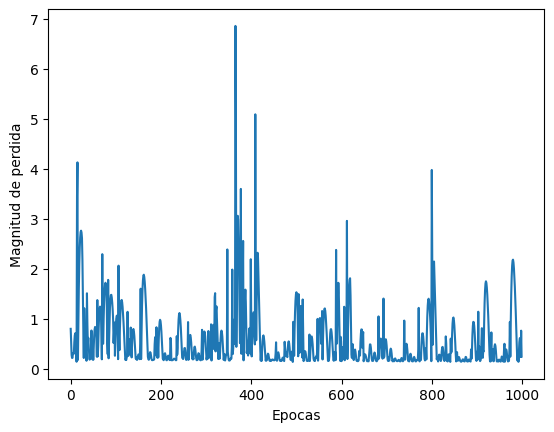

In [ ]:
# 27.imprimo para ver como evoluciona el loos
plt.xlabel("Epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])


In [ ]:
# 28.saco los valores predecidos por el modelo de acuerdo
# a los valores de testeo
ypredic = model.predict(X_test)
ypredic

1/1 [==============================] - 0s 36ms/step


array([[0.997263  ],
       [0.9958661 ],
       [0.9940758 ],
       [0.98193216],
       [0.9994647 ],
       [0.7984073 ],
       [0.99898773],
       [0.99365276],
       [0.9939512 ]], dtype=float32)

In [ ]:
# 29.creo un data frame resultados con los valores predichos
resultados = pd.DataFrame(np.round(ypredic), columns=["Estimacion"])
resultados

,Estimacion
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0


In [ ]:
# 30.agrego los valores reales
resultados["Valor_Real"] = pd.Series(y_test)
resultados

,Estimacion,Valor_Real
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1
5,1.0,0
6,1.0,1
7,1.0,1
8,1.0,1


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
matriz = confusion_matrix(resultados['Valor_Real'], resultados['Estimacion'])

In [ ]:
disp = ConfusionMatrixDisplay(matriz)

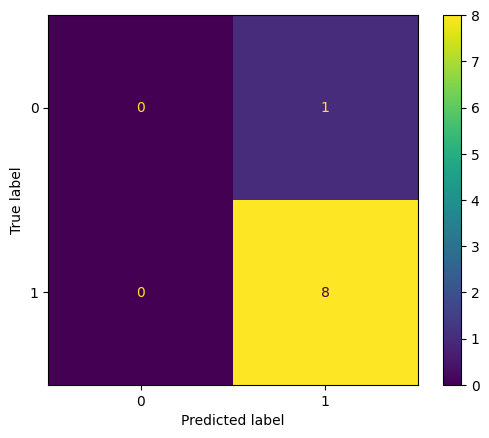

In [ ]:
#31.imprimo la matrix de comfucion
disp.plot()

# 8 valores predichos coincide  con los valores reales de comprar y 1 no coincide con el valor real de no comprar